In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Conv3D, MaxPooling3D
import json
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

2023-04-21 08:50:54.447279: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-21 08:50:54.552882: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 08:50:55.142118: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
with open('./Annotations/training01.traco') as file:
    sample_ann = json.load(file)
    

y = []

for i in range(100):    
    y.append(sample_ann['rois'][i]['pos'])

y = np.array(y)
y.shape

(100, 2)

In [3]:
# Load the images
images = []
for i in range(100):
    img_path = f'./Videos/training01/frame{i}.jpg'
    img = load_img(img_path, color_mode = "grayscale", target_size=(int(768 / 2), int(1024 / 2)))
    img = img_to_array(img)
    images.append(img)
X = np.array(images)
X.shape

(100, 384, 512, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [5]:
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (80, 384, 512, 1)
X test shape: (20, 384, 512, 1)
y train shape: (80, 2)
y test shape: (20, 2)


In [6]:
# plt.imshow(X_train[0])

In [7]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2))

2023-04-21 08:51:01.101127: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-21 08:51:01.164795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-21 08:51:01.164936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
# Compile the model
model.compile(loss='mse', optimizer='adam')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 382, 510, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 191, 255, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 189, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 94, 126, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 92, 124, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 46, 62, 128)      0

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


2023-04-21 08:51:13.235618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-21 08:51:14.634535: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-21 08:51:14.646745: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x269ed910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-21 08:51:14.646755: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-04-21 08:51:14.659808: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-21 08:51:14.796933: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime o

1/3 [=========>....................] - ETA: 18s - loss: 299236.3750

2023-04-21 08:51:21.199181: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.76GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


3/3 [==============================] - 14s 2s/step - loss: 191632.6719 - val_loss: 54285.7734
Epoch 2/50
3/3 [==============================] - 1s 167ms/step - loss: 85210.8281 - val_loss: 85656.4141
Epoch 3/50
3/3 [==============================] - 0s 149ms/step - loss: 88329.7656 - val_loss: 53113.4492
Epoch 4/50
3/3 [==============================] - 0s 155ms/step - loss: 70868.6094 - val_loss: 40336.6875
Epoch 5/50
3/3 [==============================] - 0s 150ms/step - loss: 57123.3672 - val_loss: 68549.4141
Epoch 6/50
3/3 [==============================] - 0s 152ms/step - loss: 56875.0742 - val_loss: 52276.3359
Epoch 7/50
3/3 [==============================] - 0s 149ms/step - loss: 57859.5508 - val_loss: 46045.8320
Epoch 8/50
3/3 [==============================] - 0s 151ms/step - loss: 53528.6250 - val_loss: 43349.1289
Epoch 9/50
3/3 [==============================] - 0s 149ms/step - loss: 54153.5820 - val_loss: 41811.4922
Epoch 10/50
3/3 [==============================] - 0s 149m

In [11]:
sample = np.array(X_test)
# e = np.expand_dims(sample, axis=0)

In [12]:
sample.shape

(20, 384, 512, 1)

In [13]:
# for idx, img in enumerate(X_test):
#     e = np.expand_dims(img, axis=0)
#     p = model.predict(e)
#     print(p, y_test[idx])

TypeError: 'History' object is not subscriptable

In [29]:
for idx, img in enumerate(X_test):
    center = (int(y_test[idx][0]), int(y_test[idx][1]))
    radius = 5
    color = (255, 0, 0)
    color_pred = (0, 0, 255)
    thickness = 3
    
    expanded_img = np.expand_dims(img, axis=0)
    predicted = list(model.predict(expanded_img)[0])
    print(predicted, y_test[idx])
#     center_pred = (int(predicted[0]), int(predicted[1]))
    
#     img = array_to_img(img)
#     start_point = (int(sample_ann['rois'][i]['pos'][0]), int(sample_ann['rois'][i]['pos'][1]))
#     end_point = (int(sample_ann['rois'][i + 1]['pos'][0]), int(sample_ann['rois'][i + 1]['pos'][1]))
#     img = cv2.circle(img, center, radius, color, thickness)
#     img = cv2.circle(img, center_pred, radius, color_pred, thickness)
#     sample_img = cv2.arrowedLine(sample_img, start_point, end_point, color, thickness)

#     plt.imshow(img)
#     cv2.imshow('img', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

1/1 [==============================] - 0s 12ms/step
[607.77325, 283.3918] [601.1357513  243.13367876]
1/1 [==============================] - 0s 12ms/step
[297.71198, 441.84744] [320.99481865 435.73056995]
1/1 [==============================] - 0s 12ms/step
[228.86958, 417.23157] [222.23930131 424.24454148]
1/1 [==============================] - 0s 11ms/step
[309.85986, 588.02167] [230.28820961 743.51790393]
1/1 [==============================] - 0s 12ms/step
[840.63416, 142.7424] [938.57823834 104.65492228]
1/1 [==============================] - 0s 11ms/step
[766.5532, 419.3616] [817.85851528 437.65938865]
1/1 [==============================] - 0s 12ms/step
[737.8692, 426.79178] [892.98165939 494.00174672]
1/1 [==============================] - 0s 12ms/step
[478.0122, 514.9614] [541.51266376 547.66113537]
1/1 [==============================] - 0s 11ms/step
[633.8379, 320.49686] [698.23005181 236.76683938]
1/1 [==============================] - 0s 11ms/step
[648.59015, 480.51132] [654.1

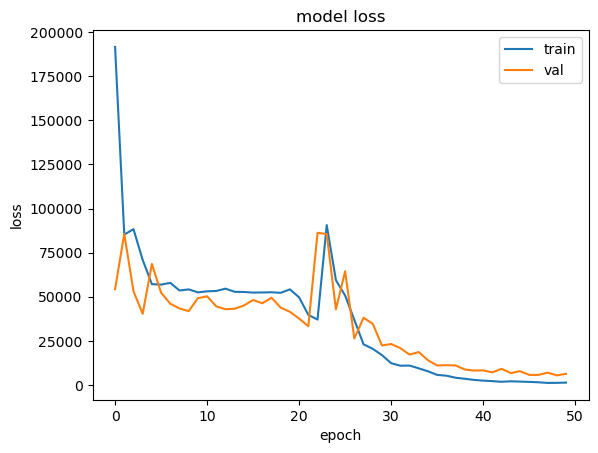

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()